In [30]:
import numpy as np
import matplotlib.pyplot as plt

def SIR(S0, I0, R0=0, beta=0.1, gamma=0.05, t_max=4800):
    # Initial conditions
    N = S0 + I0 + R0
    t = 0

    # Lists to store results
    times = [t]
    S = [S0]
    I = [I0]
    R = [R0]

    # Simulation loop
    while t < t_max and I[-1] > 0:
        rate_infection = beta * S[-1] * I[-1] / N
        rate_recovery = gamma * I[-1]

        R_total = rate_infection + rate_recovery

        # Time until next event
        delta_t = -np.log(np.random.rand()) / R_total
        t += delta_t
        times.append(t)

        # Determine which event occurs
        rand = np.random.rand() * R_total
        if rand < rate_infection:
            S.append(S[-1] - 1)
            I.append(I[-1] + 1)
            R.append(R[-1])
        elif rand < rate_infection + rate_recovery:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1] + 1)
        else:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1])

    # Plot results
    plt.figure(figsize=(10,6))
    plt.plot(times, S, label='Susceptible', color='blue')
    plt.plot(times, I, label='Infectious', color='red')
    plt.plot(times, R, label='Recovered', color='green')
    plt.title(f"Stochastic SIR model with beta = {beta} and gamma = {gamma}")
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()


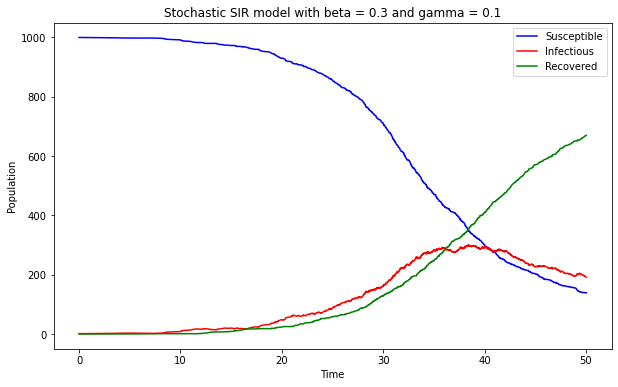

In [43]:
SIR(S0=1000, I0=1, t_max=50, beta=0.3, gamma=0.1)

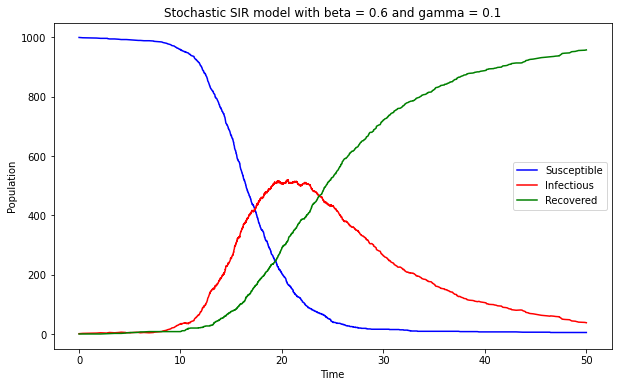

In [46]:
SIR(S0=1000, I0=1, t_max=50, beta=0.6, gamma=0.1)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def SIRD(S0=1000, I0=10, R0=0, D0=0, beta=0.3, gamma=0.1, mu=0.05, t_max=4800):
    N = S0 + I0 + R0

    # Time parameters
    t_max = 160
    t = 0

    # Lists to store results
    times = [t]
    S = [S0]
    I = [I0]
    R = [R0]
    D = [D0]

    # Simulation loop
    while t < t_max and I[-1] > 0:
        rate_infection = beta * S[-1] * I[-1] / N
        rate_recovery = gamma * I[-1]
        rate_death = mu * I[-1]

        R_total = rate_infection + rate_recovery + rate_death

        # Time until next event
        delta_t = -np.log(np.random.rand()) / R_total
        t += delta_t
        times.append(t)

        # Determine which event occurs
        rand = np.random.rand() * R_total
        if rand < rate_infection:
            S.append(S[-1] - 1)
            I.append(I[-1] + 1)
            R.append(R[-1])
            D.append(D[-1])  
        elif rand < rate_infection + rate_recovery:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1] + 1)
            D.append(D[-1])  
        else:
            S.append(S[-1])
            I.append(I[-1] - 1)
            R.append(R[-1])
            D.append(D[-1] + 1)  

    # Plot results
    plt.figure(figsize=(10,6))
    plt.plot(times, S, label='Susceptible')
    plt.plot(times, I, label='Infectious')
    plt.plot(times, R, label='Recovered')
    plt.plot(times, D, label='Deceased')  
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.show()


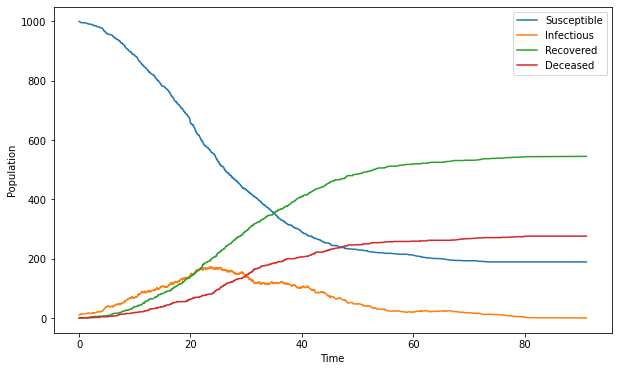

In [19]:
SIRD()

R0: 2.9999999999999996


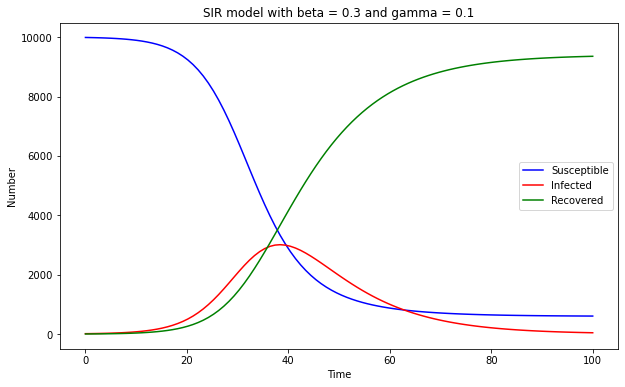

R0: 5.999999999999999


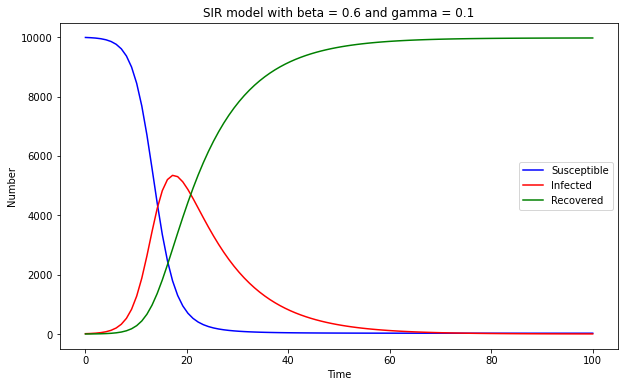

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
N = 1_000*10
betas = [0.3,0.6]
gamma = 0.1
I0 = 1*10
R0 = 0
S0 = N - I0 - R0
days = 100

# ODEs
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions
y0 = S0, I0, R0
t = np.linspace(0, days, days)

# Trying to different beta values
for beta in betas:
    print(f'R0: {beta/gamma}')
    # Integrate the SIR equations
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Plot results
    plt.figure(figsize=(10,6))
    plt.plot(t, S, 'b', label='Susceptible')
    plt.plot(t, I, 'r', label='Infected')
    plt.plot(t, R, 'g', label='Recovered')
    plt.title(f'SIR model with beta = {beta} and gamma = {gamma}')
    plt.xlabel('Time')
    plt.ylabel('Number')
    plt.legend()
    plt.show()